## **Matrix Exponential**
---

>## Exponential functions in Julia

- **Numerical**: `exp(A)`
- **Symbolics**: 
    - Define variables: `@syms ...`
    - `exp(At)`...
$$
A_1 = \begin{bmatrix} a_{11} & 0 \\ 0 & a_{22} \end{bmatrix}, \quad
e^{A_1 t} = 
\begin{bmatrix}
e^{a_{11} t} & 0 \\
0 & e^{a_{22} t}
\end{bmatrix}
$$
$$
A_2 = \begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}, \quad
e^{A_2 t} = 
\begin{bmatrix}
\cos(t) & \sin(t) \\
-\sin(t) & \cos(t)
\end{bmatrix}
$$

In [15]:
using SymPy, LinearAlgebra

In [16]:
m = 5 # kg
k = 2 # N/m
b = 3 # Ns/m (Newton seconds per meter)
A = [0 1; -k/m -b/m]
expA = exp(A)

# Comparison of exp(A) and exp.(A)
[exp(A) exp.(A)] # not the same

2×4 Matrix{Float64}:
  0.839867  0.703132  1.0      2.71828
 -0.281253  0.417988  0.67032  0.548812

In [ ]:
# Raising a diagonal matrix to a power gives a diagonal matrix with entries raised to the same power
@syms a11 a22 t   # NOT @vars
A1 = [a11 0; 0 a22]
A1t = A1*t  # Define a 2x2 square matrix
expA1t =exp(A1t)  # Compute the matrix exponential function

2×2 Matrix{Sym{PyCall.PyObject}}:
 exp(a11*t)           0
          0  exp(a22*t)

In [ ]:
# Normal matrix exponential
@syms t
A2 = [0 1; -1 0]
A2t = A2*t  # Define a 2x2 square matrix
expA2t =exp(A2t)  # Compute the matrix exponential function

2×2 Matrix{Sym{PyCall.PyObject}}:
     exp(I*t)/2 + exp(-I*t)/2  -I*exp(I*t)/2 + I*exp(-I*t)/2
 I*exp(I*t)/2 - I*exp(-I*t)/2       exp(I*t)/2 + exp(-I*t)/2

In [ ]:
SymPy.simplify.(expA2t)

2×2 Matrix{Sym{PyCall.PyObject}}:
  cos(t)  sin(t)
 -sin(t)  cos(t)

>## Numerical solver vs Analytical solution

- **Numerical solve**: `x[:,k] = exp(A*t[k])*x0`
- **Analytical solution**: `du .= A*x` => `solve(problem, Tsit5())`

In [27]:
using DifferentialEquations, Plots, LaTeXStrings, LinearAlgebra

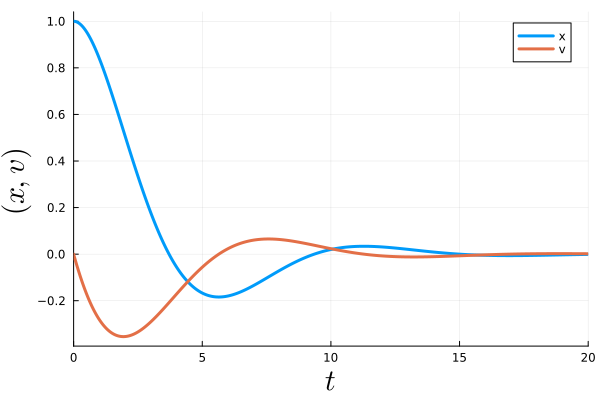

In [37]:
# Mass spring damper system
m = 5 # kg
k = 2 # N/m
b = 3 # Ns/m (Newton seconds per meter)
A = [0 1; -k/m -b/m]

# Define the ODE
function MassSpringDamper(du, x, A, t) 
    du .= A*x
end

# Set the initial condition as a vector
x0=[1; 0.0]

# Set the time interval
T = (0.0, 20) 

# Setup the ODE problem
params = A 
problem = ODEProblem(MassSpringDamper, x0, T, params)

# solve the ODE problem using the Runge Kutta Tsitouras 5/4 Integrator
sol = solve(problem, Tsit5())

#================== PLOTTING CONTINUOUS TIME SOLUTION ==================#
p1 = plot(sol, lw=3, guidefont=20, xlabel=L"t", ylabel=L"(x, v)", 
    label=["x" "v"], legend=:topright)


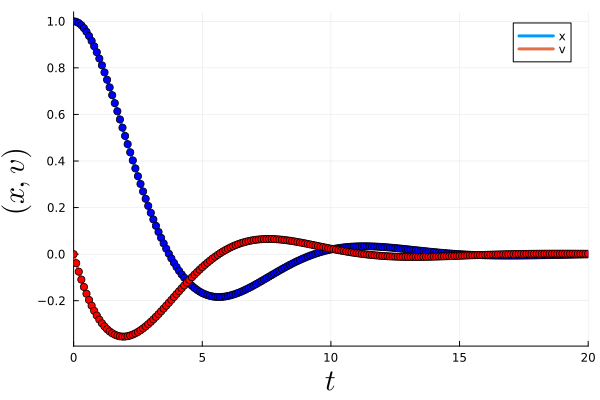

In [38]:
#================== PLOTTING DISCRETE TIME SOLUTION ==================#
dt = 0.1
t=0:dt:T[2]

# use a for loop to compute the matrix exponential for A*t[k] and
# then multiply by the initial condition to get the solution at t[k]
N = length(t)
x = zeros(2, N)
for k = 1:length(t)
    x[:,k] = exp(A*t[k])*x0
end

# Overlay the discrete-time solution with the continuous-time solution
scatter!(t, x[1,:], label = false, color=:blue)
scatter!(t, x[2,:], label = false, color=:red)

#png(p1, "MassSpringDamperComparisonSimulationChap09")
display(p1)